**Oasis Infobyte - "DATA SCIENCE INTERN"**

AUTHOR - NIKHIL ESHWAR T

TASK-3- Car Price Prediction using ML :

Importing Necessary Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Checking Null Values

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Checking number of unique values in each column

In [8]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

Checking the duplicate values

In [9]:
df.duplicated().sum()

2

Dropping the duplicate values

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [20]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

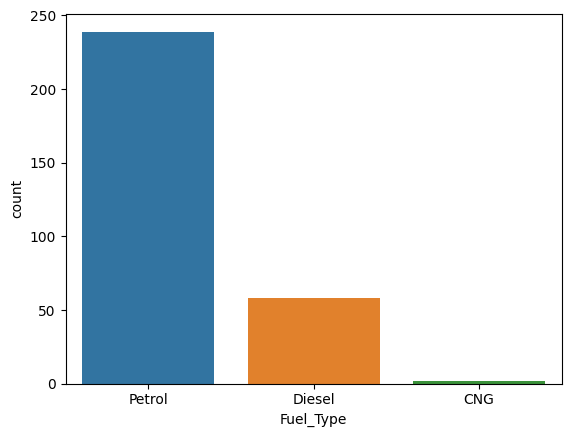

In [19]:
sns.countplot(x=df['Fuel_Type'])

<Axes: xlabel='Selling_type', ylabel='count'>

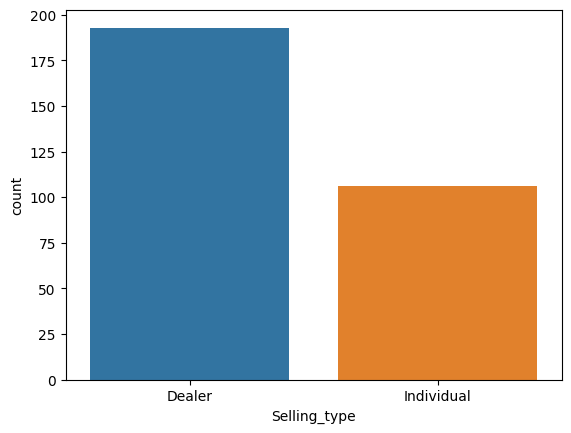

In [21]:
sns.countplot(x=df['Selling_type'])

<Axes: xlabel='Transmission', ylabel='count'>

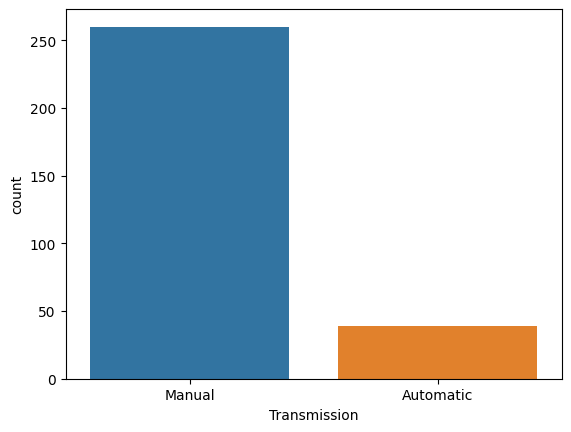

In [22]:
sns.countplot(x=df['Transmission'])

<Axes: xlabel='Owner', ylabel='count'>

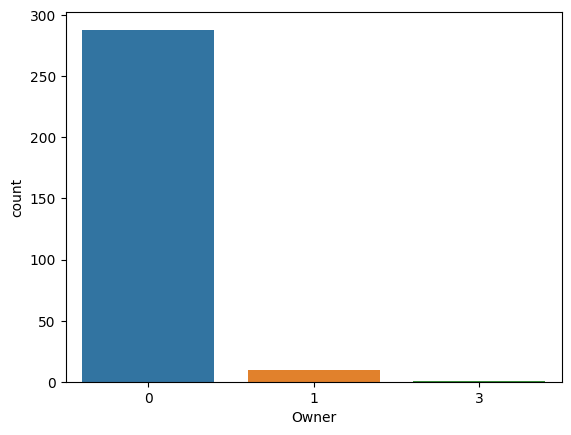

In [29]:
sns.countplot(x=df['Owner'])

<ipython-input-25-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

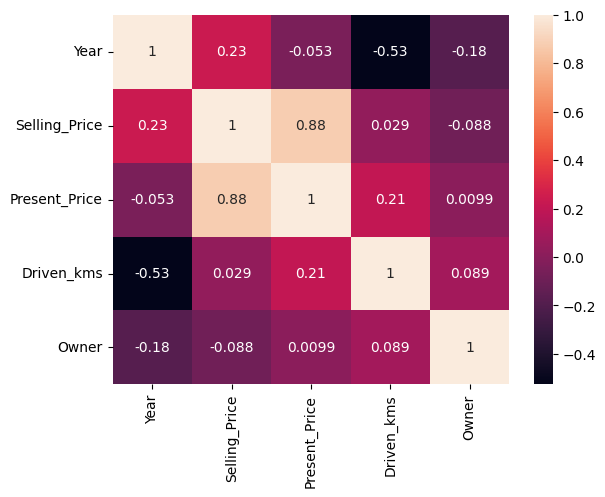

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [27]:
df['Year'].value_counts()

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [31]:
le=LabelEncoder()
df['Selling_type']=le.fit_transform(df['Selling_type'])

In [32]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])
df['Owner']=le.fit_transform(df['Owner'])

In [34]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [35]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [38]:
x=df.drop(['Selling_Price'],axis=1)

In [39]:
x.columns

Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')

In [40]:
y=df['Selling_Price']

Splitting the data

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Fitting the model with XGBoost

In [43]:
xg=XGBRegressor()

In [44]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred=xg.predict(x_test)

Evaluation Metrics

In [49]:
r2_score(y_test,y_pred)

-0.0062717767808253555

In [50]:
mean_squared_error(y_test,y_pred)

23.39623126977469

In [54]:
import joblib
filename = 'carpredmod.joblib'
joblib.dump(xg, filename)

['carpredmod.joblib']